# **HOJE VAMOS A TRABALHAR COM UMA BASE DE DADOS DE CERVEJA**
<hr style='border: 1px solid red'>
<p style=
    'font-size:18px; 
    line-height:2; 
    text-align:justify;'
    > 
O objetivo sera estimar um modelo de <b>Machine Learning</b> para estimar o consumo de cerveja baseado em algumas variavies. Desta maneira, queremos encontrar um modelo f de tal forma que
<\p>
    
$\boldsymbol{Y}=f (\boldsymbol{X})$

<p style=
    'font-size:14px; 
    line-height:2; 
    text-align:justify;'
    > 
onde $Y$ eh a variavel explicada e $X$ sao as variaveis explicadoras
<\p>

In [1]:
import pandas

bd = pandas.read_csv('/kaggle/input/beer-consumption-sao-paulo/Consumo_cerveja.csv')
bd

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [3]:
bd.shape

(941, 7)

In [4]:
bd.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [5]:
bd2 = bd.copy()
bd2.dropna(axis=0, inplace=True)
bd2.shape
bd2
bd2['Data'] = pandas.to_datetime(bd2['Data'])
bd2['Temperatura Media (C)'] = \
bd2['Temperatura Media (C)'].str.replace(',', '.').astype('float64') #posso partir a linha com esse simbolo '\'
bd2['Temperatura Minima (C)'] = bd2['Temperatura Minima (C)'].str.replace(',', '.').astype('float64')
bd2['Precipitacao (mm)'] = bd2['Precipitacao (mm)'].str.replace(',', '.').astype('float64')
bd2['Temperatura Maxima (C)'] = bd2['Temperatura Maxima (C)'].str.replace(',', '.').astype('float64')
bd2['Final de Semana'] = bd2['Final de Semana'].astype('int32')
bd2['Consumo de cerveja (litros)'] = bd2['Consumo de cerveja (litros)'].astype('float64').apply (lambda x:x*1000)
bd2

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900.0
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32307.0
361,2015-12-28,22.64,21.1,26.7,0.0,0,26095.0
362,2015-12-29,21.68,20.3,24.1,10.3,0,22309.0
363,2015-12-30,21.38,19.3,22.4,6.3,0,20467.0


# **Base de dados**
<hr style='border: 1px solid red'>

<ul style='
font-size: 18px;
text-align: justify;
'>
    <li> 0 = Data</li>
    <li> 1 = Temperatura Media (C)</li>
    <li> 2 = Temperatura Minima (C)</li>
    <li> 3 = Temperatura Maxima (C)</li>
    <li> 4 = Precipitacao (mm)</li>
    <li> 5 = Final de semana</li>
    <li> 6 = Consumo de cerveja (litros)</li>
<\ul>

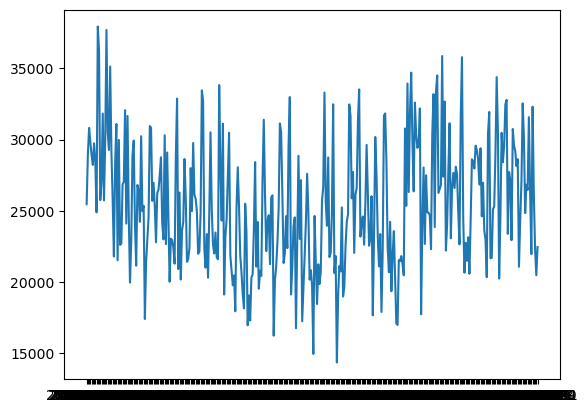

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(
    bd2['Data'].astype(str),
    bd2['Consumo de cerveja (litros)']
)

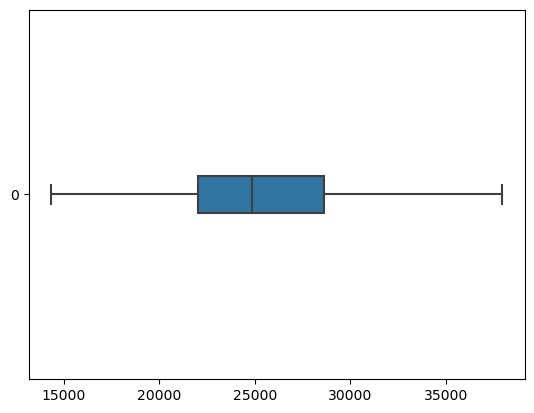

In [7]:
import seaborn as sns
ax = sns.boxplot(
    data = bd2['Consumo de cerveja (litros)'],
    orient = 'h',
    width = 0.1
)

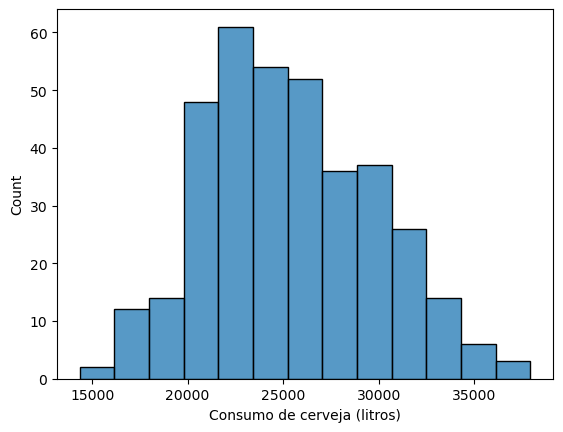

In [8]:
ax = sns.histplot(bd2['Consumo de cerveja (litros)'])

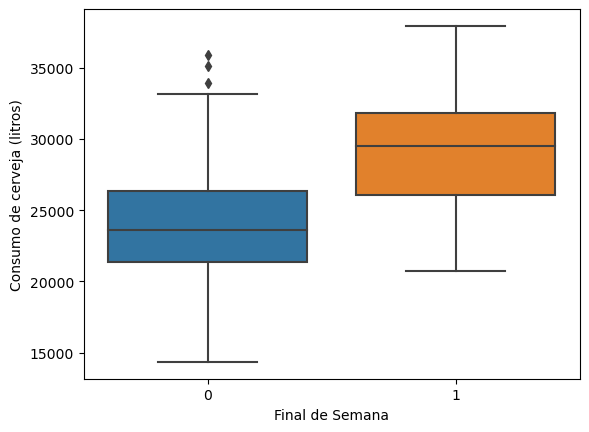

In [9]:
ax = sns.boxplot(
    y = 'Consumo de cerveja (litros)', 
    x = 'Final de Semana',
    data = bd2
)

Data# **explicar as vantagens e desvantagens de fazer uma analise usando boxplot. So da para fazer usando variaveis discretas**
# **ATE AQUI FOI TUDO UNIDIMENSIONAL**
<hr style='border: 1px solid red'>


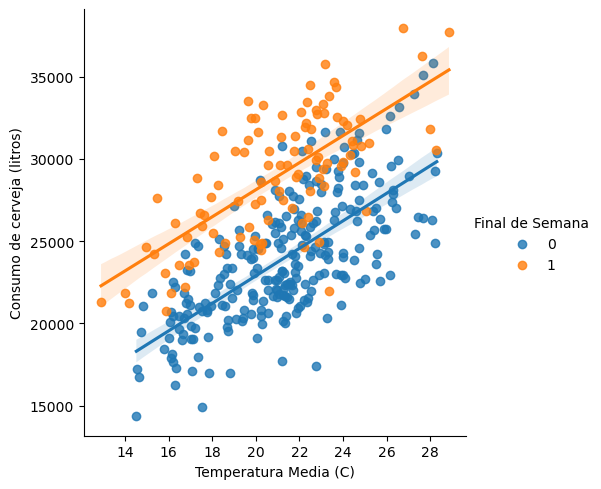

In [10]:
ax = sns.lmplot(x = 'Temperatura Media (C)', 
                y = 'Consumo de cerveja (litros)',
                hue = 'Final de Semana',
                data = bd2
)

<Figure size 640x480 with 0 Axes>

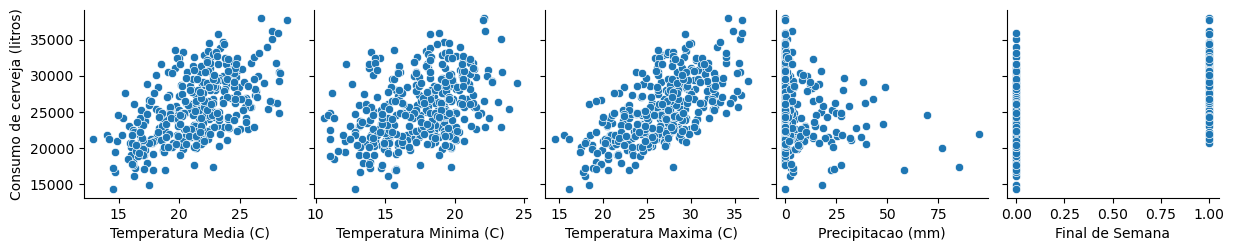

In [11]:
plt.figure(1)
ax = sns.pairplot(
    bd2,
    y_vars = 'Consumo de cerveja (litros)',
    x_vars = bd2.columns[1:-1],
    kind = 'scatter'
)

<Figure size 640x480 with 0 Axes>

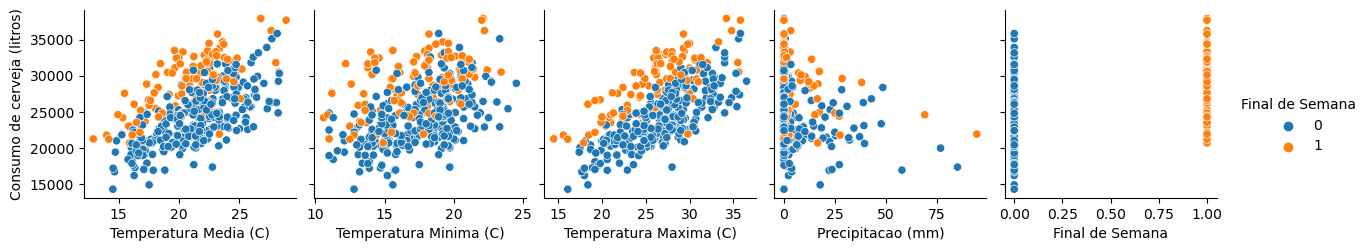

In [12]:
plt.figure(1)
ax = sns.pairplot(
    bd2,
    y_vars = 'Consumo de cerveja (litros)',
    x_vars = bd2.columns[1:-1],
    hue = 'Final de Semana',
    kind = 'scatter'
)

<Figure size 640x480 with 0 Axes>

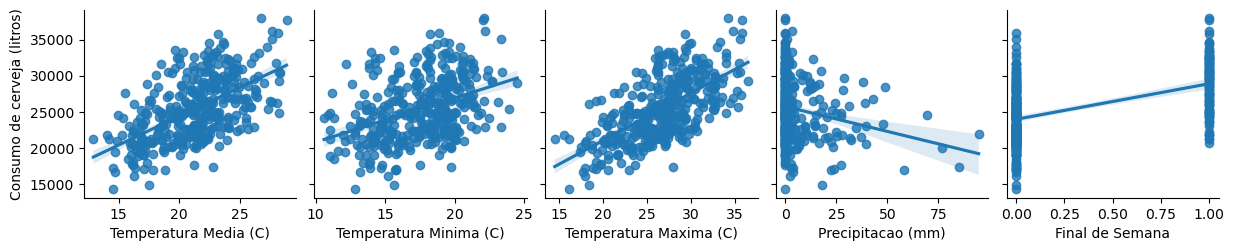

In [13]:
plt.figure(1)
ax = sns.pairplot(
    bd2,
    y_vars = 'Consumo de cerveja (litros)',
    x_vars = bd2.columns[1:-1],
    kind = 'reg'
)